### 1. Import required Libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# splitting, scaling, and encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, PowerTransformer, PolynomialFeatures

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier

# Package for handling imbalance data
!pip install imblear
!pip install mlxtend

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To view all the columns
pd.set_option('display.max_columns', None)

ERROR: Could not find a version that satisfies the requirement imblear (from versions: none)
ERROR: No matching distribution found for imblear


In [2]:
df=pd.read_csv(r'C:\Users\Mallika Yeturi\OneDrive\Desktop\bank_loan_defaulter.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
## lets check first few samples
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [4]:
## Lets check shape of the dataset
df.shape

(67463, 35)

In [5]:
## Lets check basic information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

- We have around 67K instances and 35 features.
- There seems to be no missing values in the dataset.
- We have a mix of categorical data as well as numerical data.

## Data Cleansing and Exploratory data analysis.

### 3. Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.

In [6]:
## let us check if there are any duplicated entries
len(df[df.duplicated()])

0

- There are no duplicate records in the dataset.

In [7]:
## Let us check for the percentage of missing values.
df.isnull().sum()/len(df)*100

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

- We donot have any missing values in the dataset.

### 4. Check summary statistics of the dataset, and write your key observations.

In [8]:
df.drop('ID',axis=1).describe() ## summay for numerical columns

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


- The maximum applied loan amount is 35000 dollars and minimum is 1014 dollars.
- The average term of loan is 58 months.
- The maximum Interest rate of the loan is 27%.
- The average Total received interest is around 2000 dollars.
- The maximum Total received late fee charges is around 42 dollars.

In [9]:
df.describe(include='O') ## summary for categorical columns

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


- Employment Duration, Verification Status features has 3 unique categories.
- Initial List status, Application Type has 2 unique categories.
- Batch Enrolled has 41, and Subgrade has 35, Loan Title has 109 unique categories. (need to drop, since there are many subcategories, also redundant for our analyis)

### 5. Drop the columns which you think redundant for the analysis.

In [10]:
## Dropping 'ID', 'Batch Enrolled', 'Grade', 'Sub Grade', ' Loan Title', and 'Payment Plan' 
df.drop(['ID', 'Batch Enrolled', 'Grade', 'Sub Grade', 'Loan Title', 'Payment Plan'],axis=1, inplace=True)

### 6. Perform necessary univariate and multivariate analysis.

In [11]:
## perform necessary univariate and multivariate analaysis.

In [12]:
# Display summary statistics
print(df.describe())


        Loan Amount  Funded Amount  Funded Amount Investor          Term  \
count  67463.000000   67463.000000            67463.000000  67463.000000   
mean   16848.902776   15770.599114            14621.799323     58.173814   
std     8367.865726    8150.992662             6785.345170      3.327441   
min     1014.000000    1014.000000             1114.590204     36.000000   
25%    10012.000000    9266.500000             9831.684984     58.000000   
50%    16073.000000   13042.000000            12793.682170     59.000000   
75%    22106.000000   21793.000000            17807.594120     59.000000   
max    35000.000000   34999.000000            34999.746430     59.000000   

       Interest Rate  Home Ownership  Debit to Income  \
count   67463.000000    67463.000000     67463.000000   
mean       11.846258    80541.502522        23.299241   
std         3.718629    45029.120366         8.451824   
min         5.320006    14573.537170         0.675299   
25%         9.297147    51689.

In [13]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Employment Duration', 'Home Ownership',
       'Verification Status', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

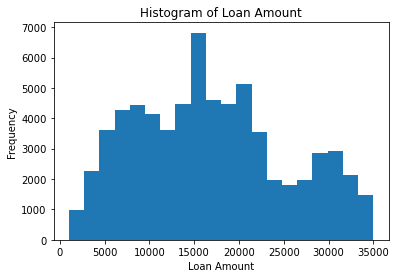

In [14]:
# Plot histogram of a numerical variable
plt.hist(df['Loan Amount'], bins=20)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()


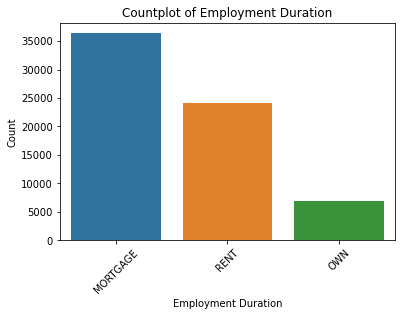

In [15]:
# Plot countplot of a categorical variable
sns.countplot(x='Employment Duration', data=df)
plt.xlabel('Employment Duration')
plt.ylabel('Count')
plt.title('Countplot of Employment Duration')
plt.xticks(rotation=45)
plt.show()


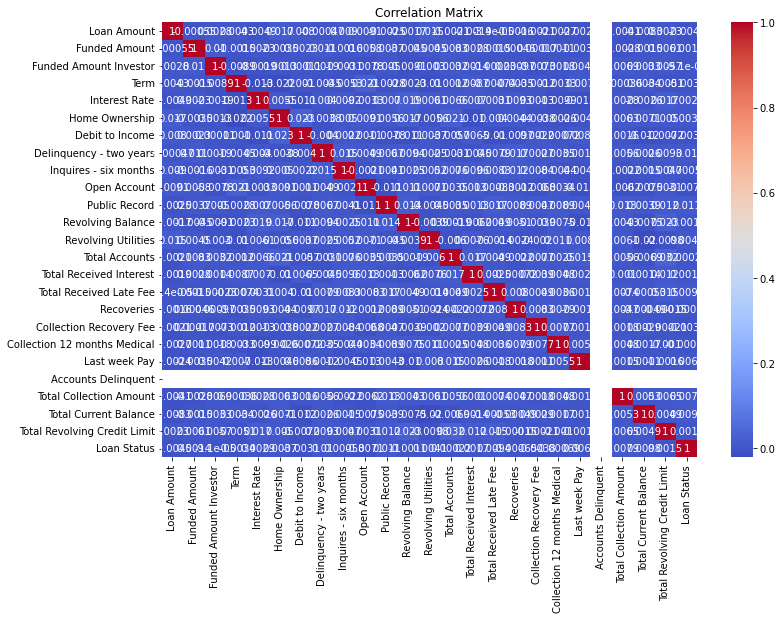

In [16]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


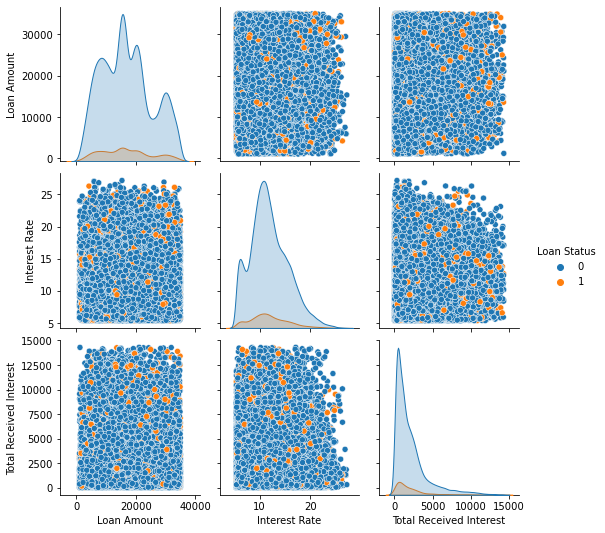

In [17]:
# Plot pairwise relationships in the dataset
sns.pairplot(df, vars=['Loan Amount', 'Interest Rate', 'Total Received Interest'], hue='Loan Status')
plt.show()


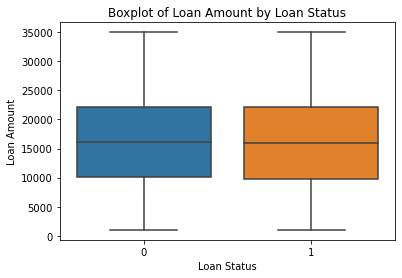

In [18]:
# Plot boxplot of a numerical variable grouped by a categorical variable
sns.boxplot(x='Loan Status', y='Loan Amount', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Boxplot of Loan Amount by Loan Status')
plt.show()


Summary Statistics for Loan Amount:
count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: Loan Amount, dtype: float64




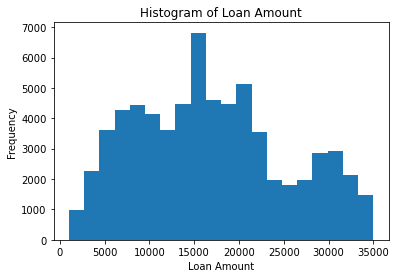

Summary Statistics for Funded Amount:
count    67463.000000
mean     15770.599114
std       8150.992662
min       1014.000000
25%       9266.500000
50%      13042.000000
75%      21793.000000
max      34999.000000
Name: Funded Amount, dtype: float64




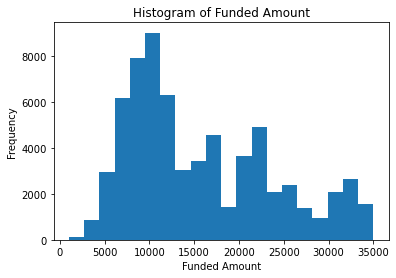

Summary Statistics for Funded Amount Investor:
count    67463.000000
mean     14621.799323
std       6785.345170
min       1114.590204
25%       9831.684984
50%      12793.682170
75%      17807.594120
max      34999.746430
Name: Funded Amount Investor, dtype: float64




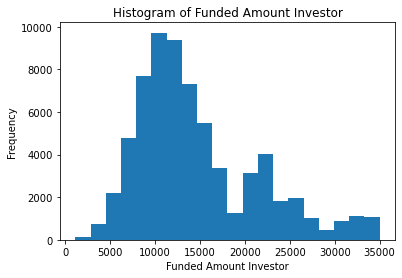

Summary Statistics for Term:
count    67463.000000
mean        58.173814
std          3.327441
min         36.000000
25%         58.000000
50%         59.000000
75%         59.000000
max         59.000000
Name: Term, dtype: float64




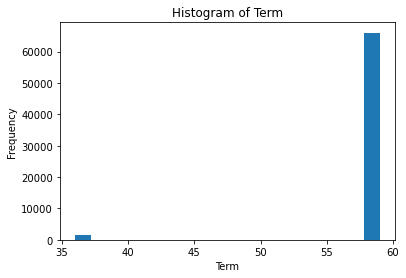

Summary Statistics for Interest Rate:
count    67463.000000
mean        11.846258
std          3.718629
min          5.320006
25%          9.297147
50%         11.377696
75%         14.193533
max         27.182348
Name: Interest Rate, dtype: float64




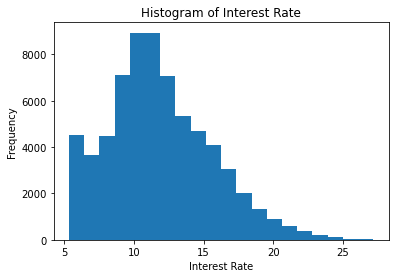

Summary Statistics for Employment Duration:
count        67463
unique           3
top       MORTGAGE
freq         36351
Name: Employment Duration, dtype: object




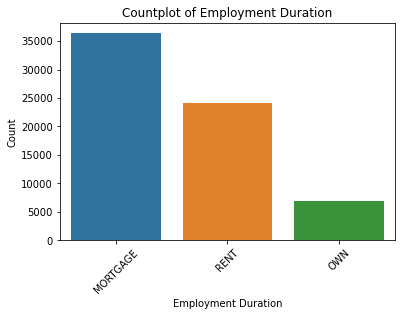

Summary Statistics for Home Ownership:
count     67463.000000
mean      80541.502522
std       45029.120366
min       14573.537170
25%       51689.843335
50%       69335.832680
75%       94623.322785
max      406561.536400
Name: Home Ownership, dtype: float64




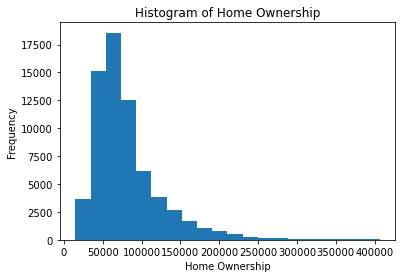

Summary Statistics for Verification Status:
count               67463
unique                  3
top       Source Verified
freq                33036
Name: Verification Status, dtype: object




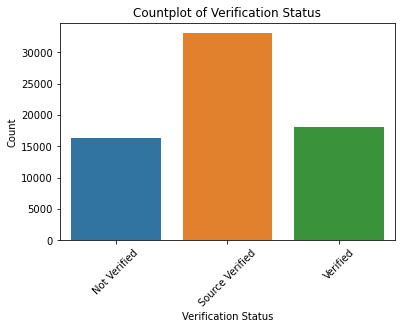

Summary Statistics for Debit to Income:
count    67463.000000
mean        23.299241
std          8.451824
min          0.675299
25%         16.756416
50%         22.656658
75%         30.048400
max         39.629862
Name: Debit to Income, dtype: float64




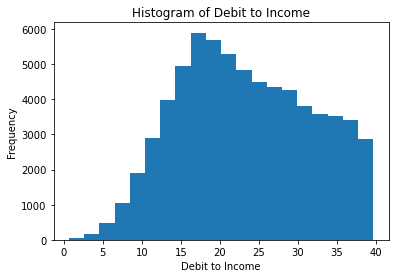

Summary Statistics for Delinquency - two years:
count    67463.000000
mean         0.327127
std          0.800888
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: Delinquency - two years, dtype: float64




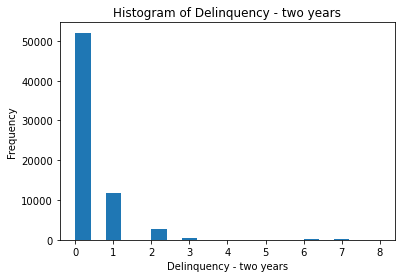

Summary Statistics for Inquires - six months:
count    67463.000000
mean         0.145754
std          0.473291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: Inquires - six months, dtype: float64




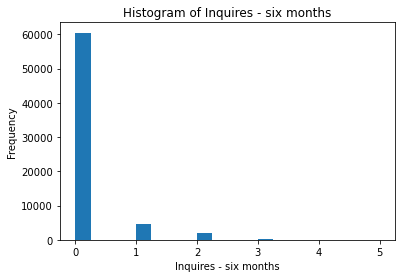

Summary Statistics for Open Account:
count    67463.000000
mean        14.266561
std          6.225060
min          2.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         37.000000
Name: Open Account, dtype: float64




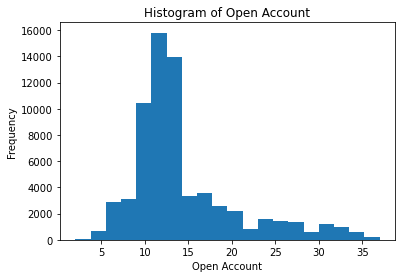

Summary Statistics for Public Record:
count    67463.000000
mean         0.081437
std          0.346606
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: Public Record, dtype: float64




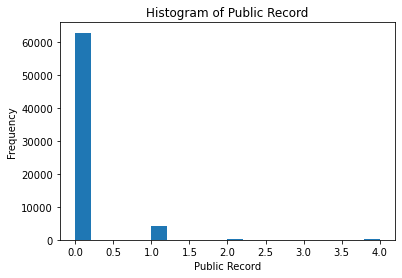

Summary Statistics for Revolving Balance:
count     67463.000000
mean       7699.342425
std        7836.148190
min           0.000000
25%        2557.000000
50%        5516.000000
75%       10184.500000
max      116933.000000
Name: Revolving Balance, dtype: float64




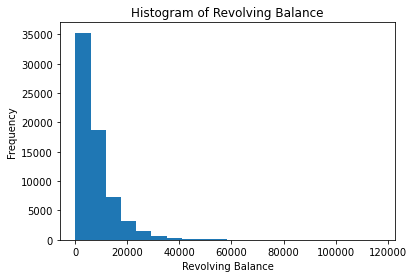

Summary Statistics for Revolving Utilities:
count    67463.000000
mean        52.889443
std         22.539450
min          0.005172
25%         38.658825
50%         54.082334
75%         69.177117
max        100.880050
Name: Revolving Utilities, dtype: float64




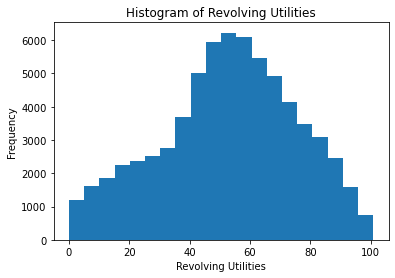

Summary Statistics for Total Accounts:
count    67463.000000
mean        18.627929
std          8.319246
min          4.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         72.000000
Name: Total Accounts, dtype: float64




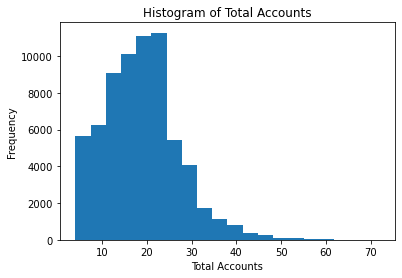

Summary Statistics for Initial List Status:
count     67463
unique        2
top           w
freq      36299
Name: Initial List Status, dtype: object




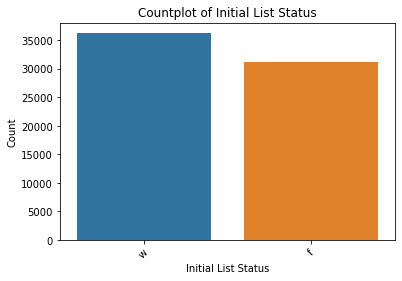

Summary Statistics for Total Received Interest:
count    67463.000000
mean      2068.992542
std       2221.918745
min          4.736746
25%        570.903814
50%       1330.842771
75%       2656.956837
max      14301.368310
Name: Total Received Interest, dtype: float64




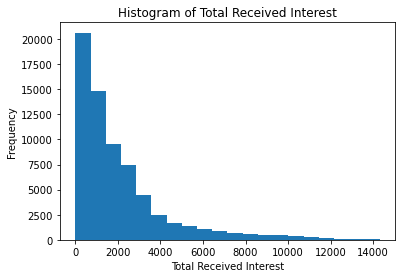

Summary Statistics for Total Received Late Fee:
count    67463.000000
mean         1.143969
std          5.244365
min          0.000003
25%          0.021114
50%          0.043398
75%          0.071884
max         42.618882
Name: Total Received Late Fee, dtype: float64




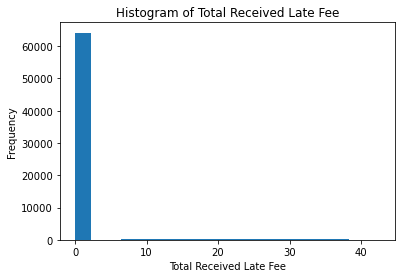

Summary Statistics for Recoveries:
count    67463.000000
mean        59.691578
std        357.026346
min          0.000036
25%          1.629818
50%          3.344524
75%          5.453727
max       4354.467419
Name: Recoveries, dtype: float64




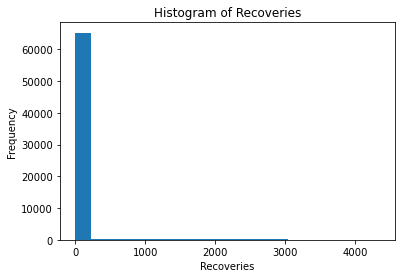

Summary Statistics for Collection Recovery Fee:
count    67463.000000
mean         1.125141
std          3.489885
min          0.000036
25%          0.476259
50%          0.780141
75%          1.070566
max        166.833000
Name: Collection Recovery Fee, dtype: float64




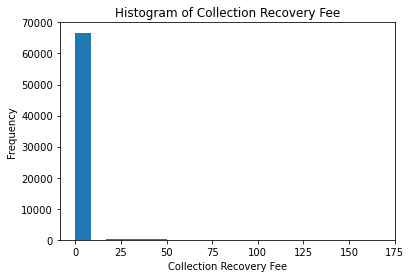

Summary Statistics for Collection 12 months Medical:
count    67463.000000
mean         0.021301
std          0.144385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Collection 12 months Medical, dtype: float64




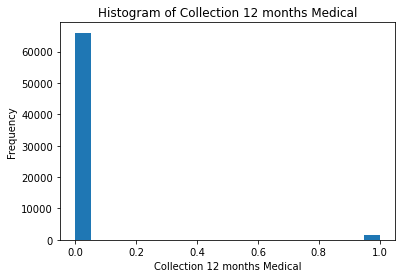

Summary Statistics for Application Type:
count          67463
unique             2
top       INDIVIDUAL
freq           67340
Name: Application Type, dtype: object




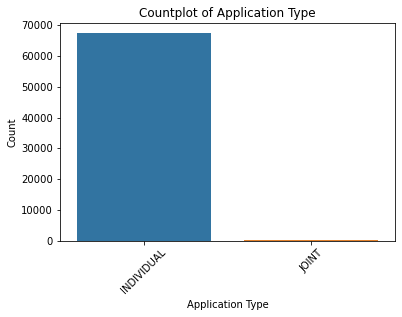

Summary Statistics for Last week Pay:
count    67463.000000
mean        71.163260
std         43.315845
min          0.000000
25%         35.000000
50%         68.000000
75%        105.000000
max        161.000000
Name: Last week Pay, dtype: float64




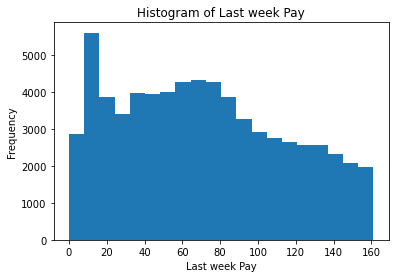

Summary Statistics for Accounts Delinquent:
count    67463.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Accounts Delinquent, dtype: float64




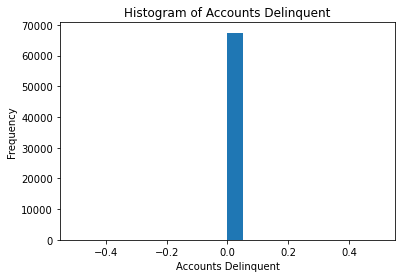

Summary Statistics for Total Collection Amount:
count    67463.000000
mean       146.467990
std        744.382233
min          1.000000
25%         24.000000
50%         36.000000
75%         46.000000
max      16421.000000
Name: Total Collection Amount, dtype: float64




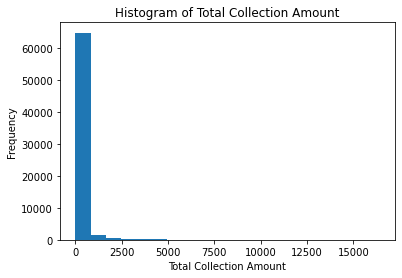

Summary Statistics for Total Current Balance:
count    6.746300e+04
mean     1.595739e+05
std      1.390332e+05
min      6.170000e+02
25%      5.037900e+04
50%      1.183690e+05
75%      2.283750e+05
max      1.177412e+06
Name: Total Current Balance, dtype: float64




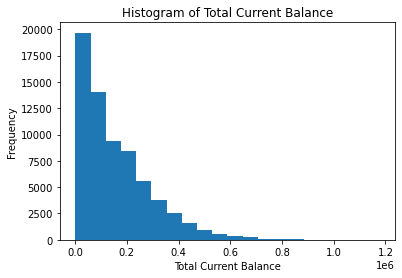

Summary Statistics for Total Revolving Credit Limit:
count     67463.000000
mean      23123.005544
std       20916.699999
min        1000.000000
25%        8155.500000
50%       16733.000000
75%       32146.500000
max      201169.000000
Name: Total Revolving Credit Limit, dtype: float64




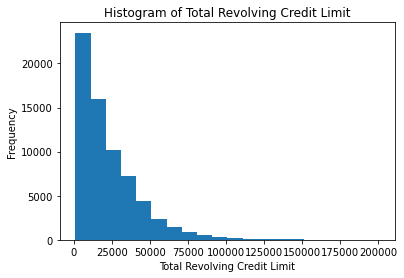

Summary Statistics for Loan Status:
count    67463.000000
mean         0.092510
std          0.289747
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Loan Status, dtype: float64




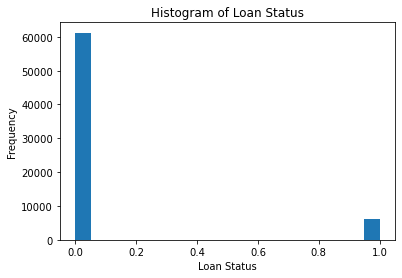

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is stored in a variable named 'df'


# Univariate Analysis
for column in df.columns:
    # Summary Statistics
    print(f"Summary Statistics for {column}:")
    print(df[column].describe())
    print("\n")

    # Histogram for numerical variables
    if df[column].dtype != object:
        plt.hist(df[column], bins=20)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {column}')
        plt.show()
    else:
        # Countplot for categorical variables
        sns.countplot(x=column, data=df)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Countplot of {column}')
        plt.xticks(rotation=45)
        plt.show()



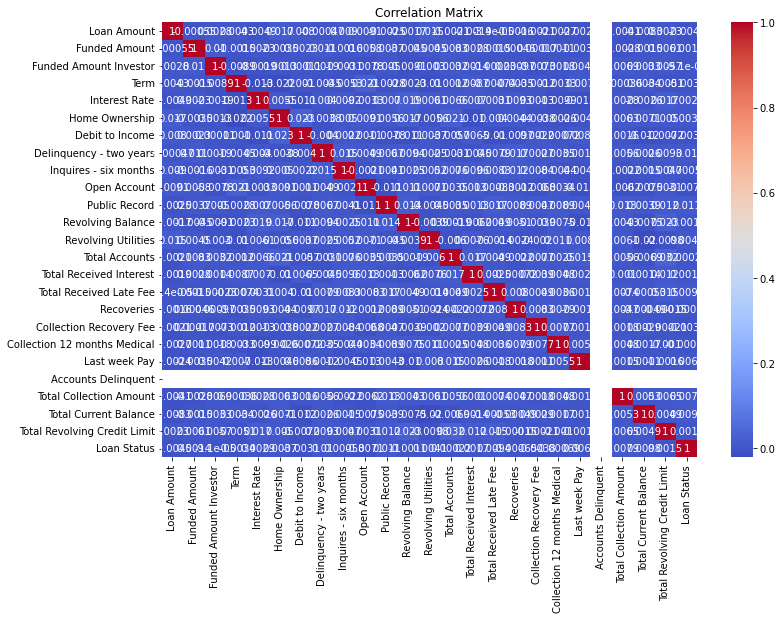

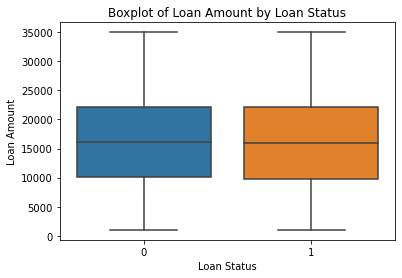

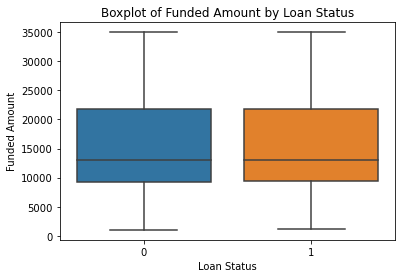

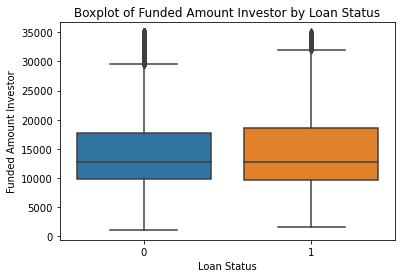

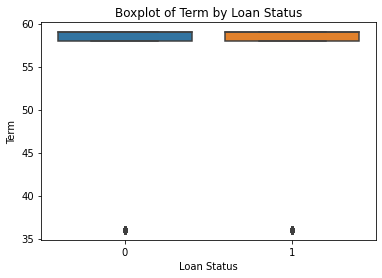

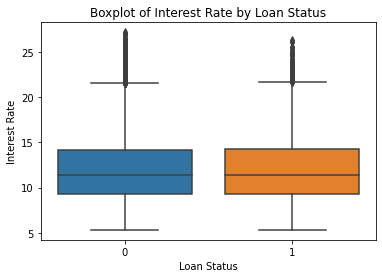

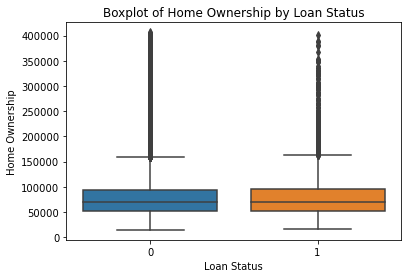

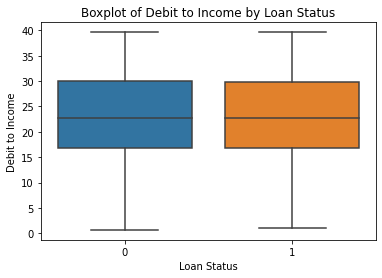

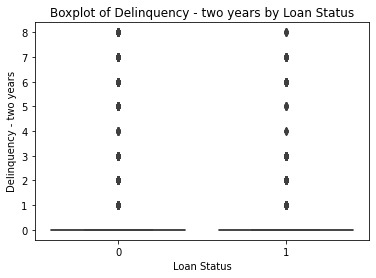

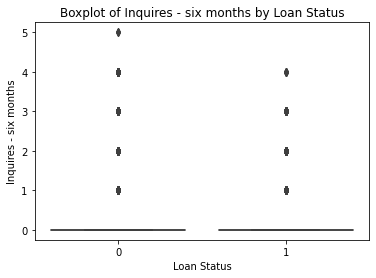

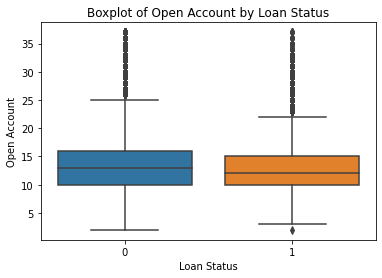

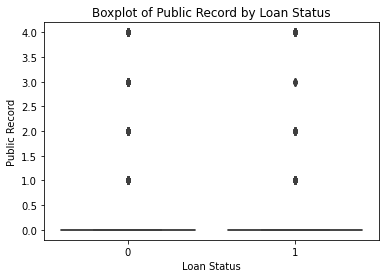

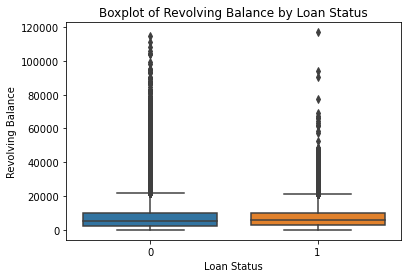

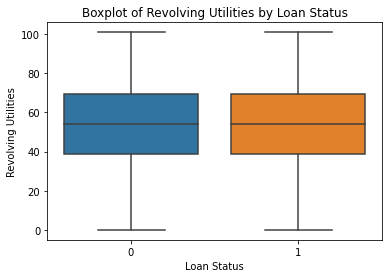

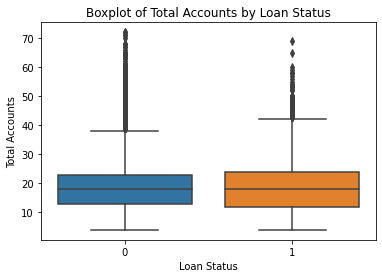

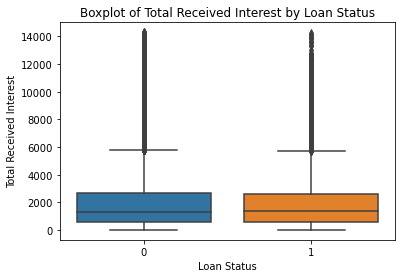

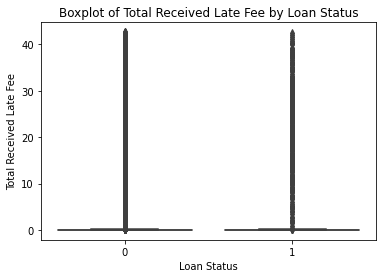

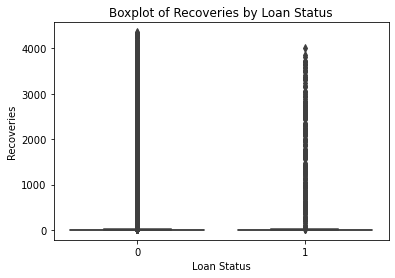

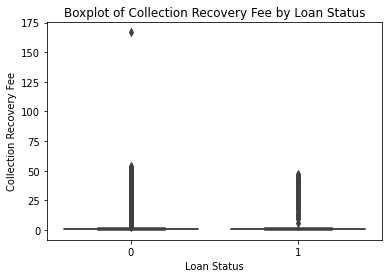

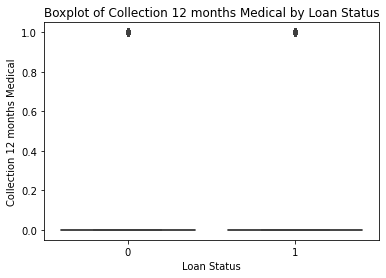

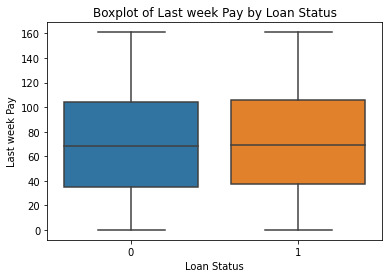

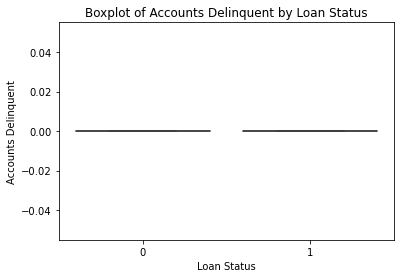

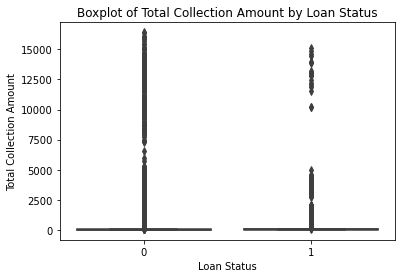

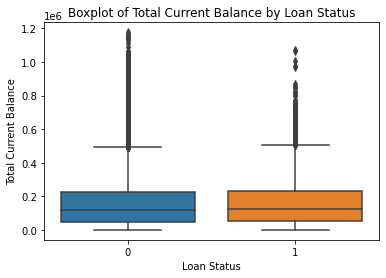

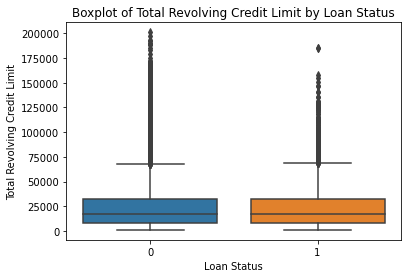

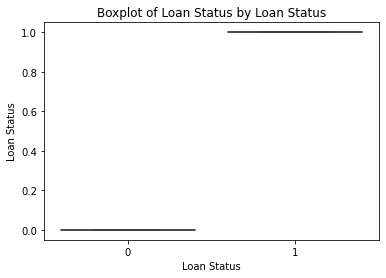

In [20]:
# Multivariate Analysis
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Boxplot for numerical variables by Loan Status
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    sns.boxplot(x='Loan Status', y=column, data=df)
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.title(f'Boxplot of {column} by Loan Status')
    plt.show()


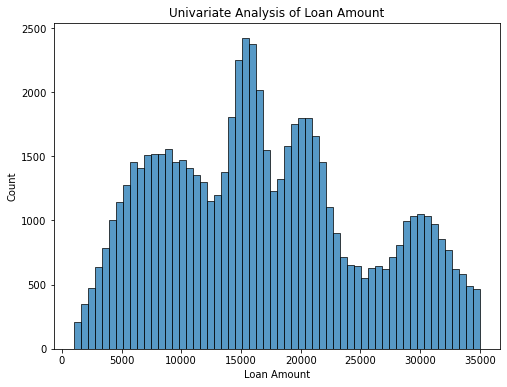

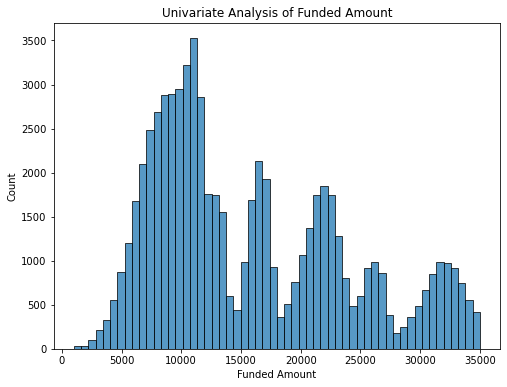

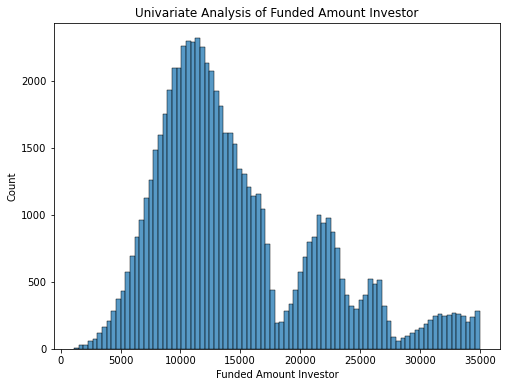

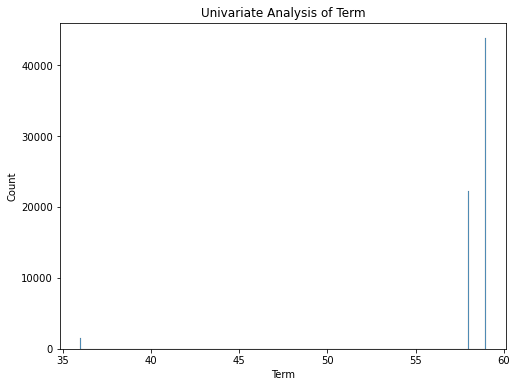

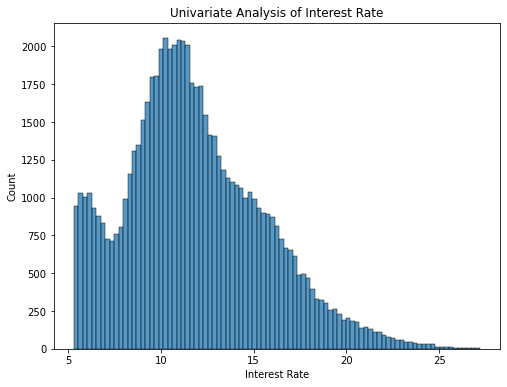

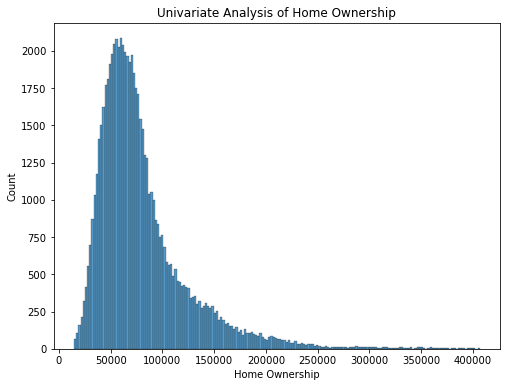

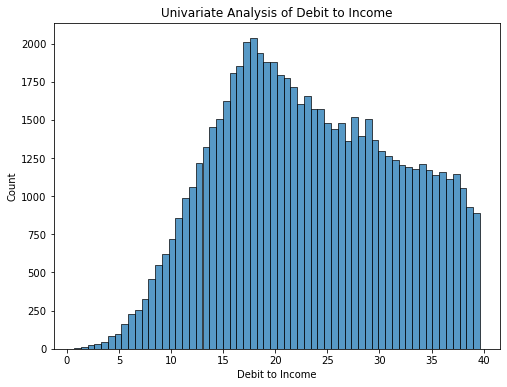

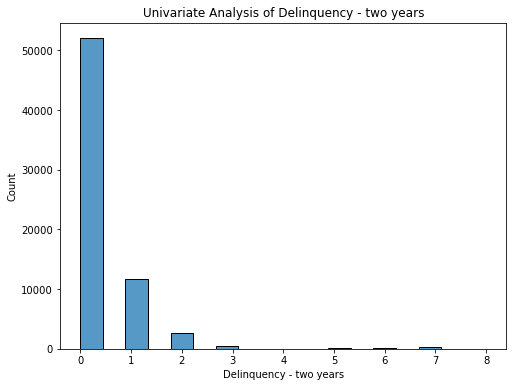

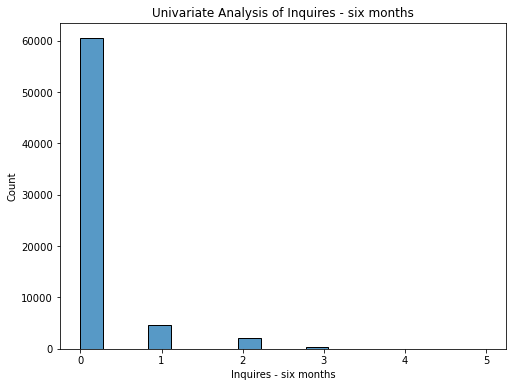

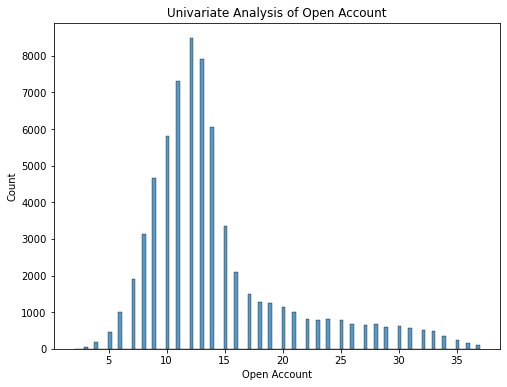

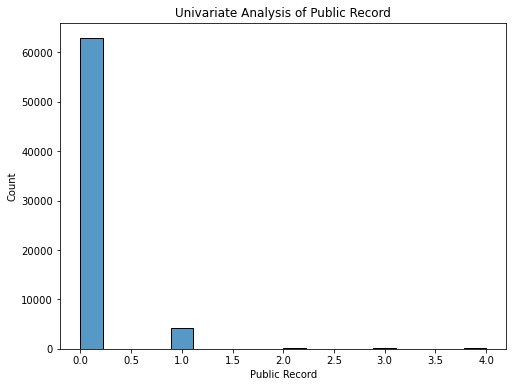

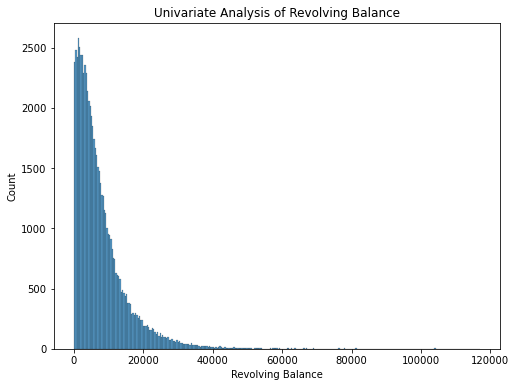

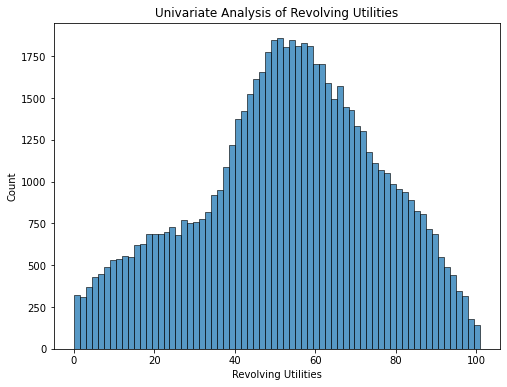

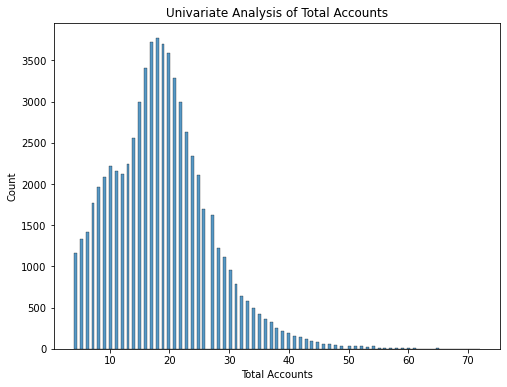

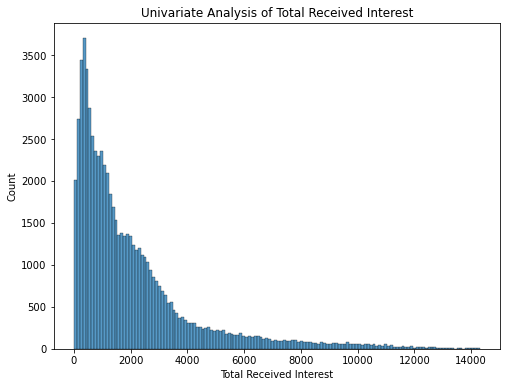

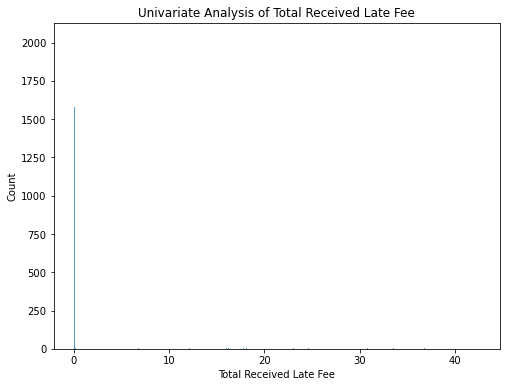

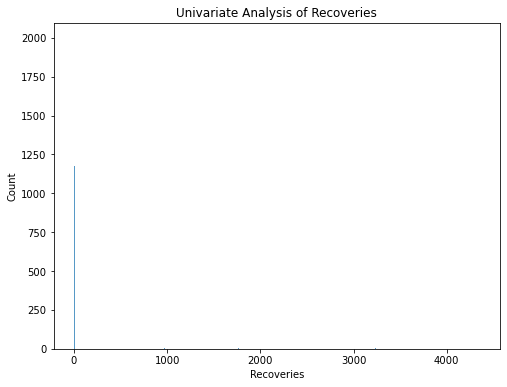

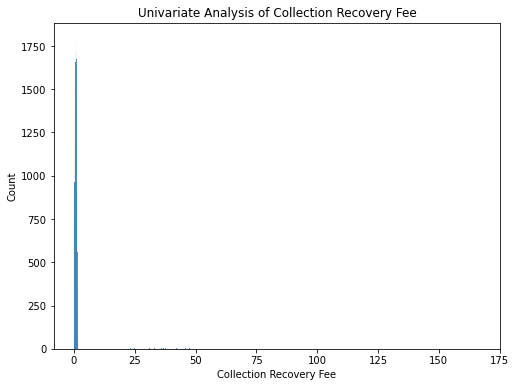

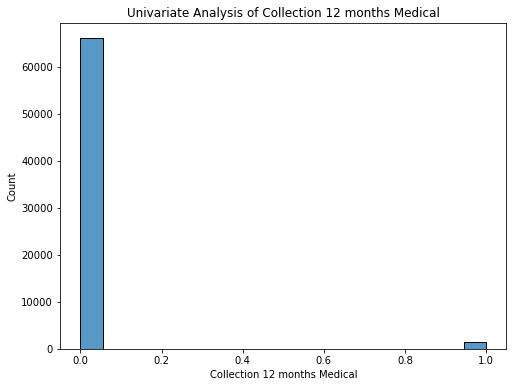

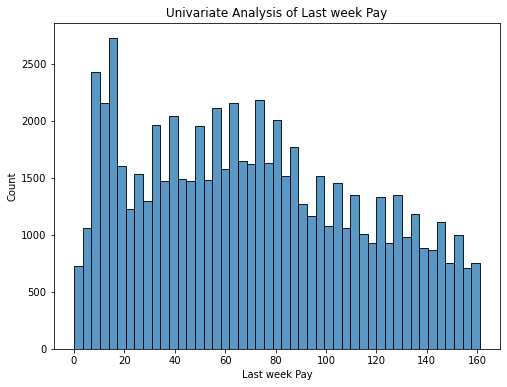

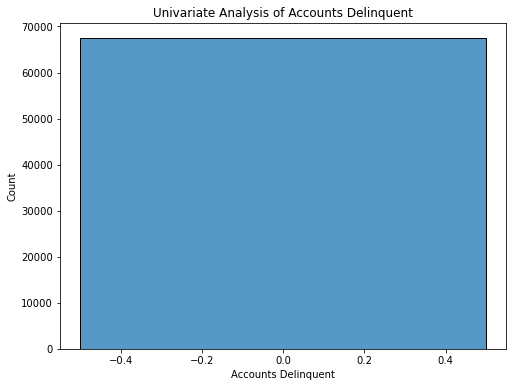

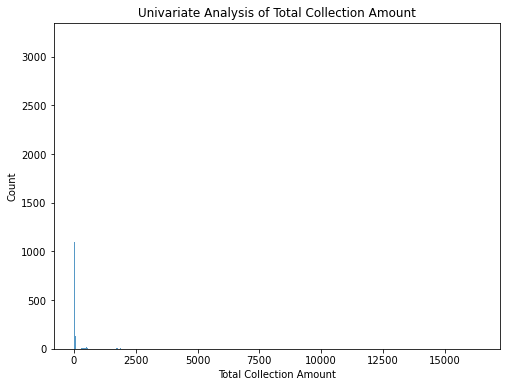

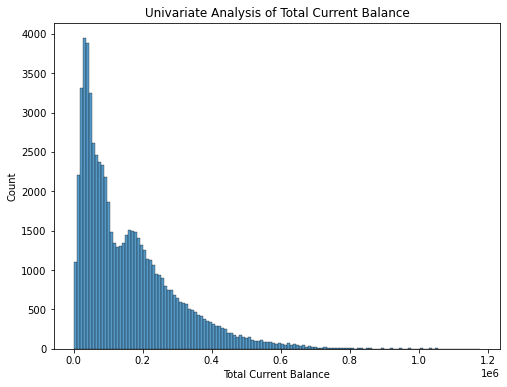

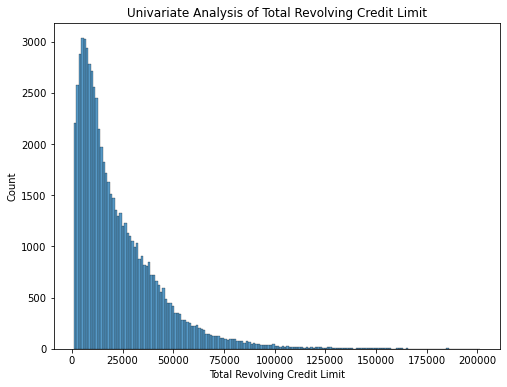

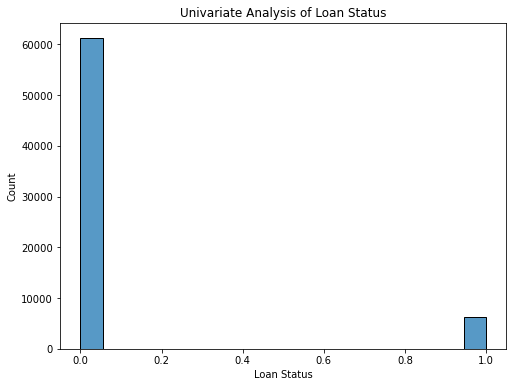

In [21]:
# Perform univariate analysis
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column)
        plt.title(f'Univariate Analysis of {column}')
        plt.show()


### 7. Check the distribution of the target column 'Loan Status', and comment on the class distribution

In [22]:
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [23]:
df['Loan Status'].value_counts(normalize=True)*100

0    90.749003
1     9.250997
Name: Loan Status, dtype: float64

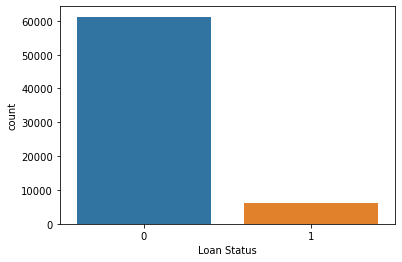

In [24]:
sns.countplot(df['Loan Status'])
plt.show()

- The target class is highly imbalanced. 
- In this case the classifier will always predicts the most common class without performing any analysis of the features and it will have a high accuracy rate, where the accuray is not good metric in such cases.
- In such cases we need to go for handling the imbalance dataset using oversampling or downsampling approaches.

## Data Preparation for the Model building

### 8. Segregate the target and independent features.

In [25]:
X = df.drop('Loan Status',axis=1)
y = df['Loan Status']

### 9. Encode the categorical data.

In [26]:
X = pd.get_dummies(X,drop_first=True)
X.head(2)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Employment Duration_OWN,Employment Duration_RENT,Verification Status_Source Verified,Verification Status_Verified,Initial List Status_w,Application Type_JOINT
0,10000,32236,12329.36286,59,11.135007,176346.6267,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0,0,0,0,1,0
1,3609,11940,12191.99692,59,12.237563,39833.9210,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0,1,1,0,0,0


### 10. Handle the imbalanced data using oversampling or undersampling approach, and check the distribution of the resampled target class.

In [27]:
## Here, we are balancing the imbalanced data using Oversampling approach.

In [28]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy=0.65) ## pass sampling strategy to make the target class distribution 60%-40%

X_resample, y_resample = oversample.fit_resample(X, y)

In [29]:
## Checking the distribution of the resampled target class
pd.DataFrame(y_resample).value_counts(normalize=True)*100

Loan Status
0              60.606241
1              39.393759
dtype: float64

- We can observe, we have successfully oversampled the minority class, and the distribution of the target class is balanced 60%-40%.

### 11. Split the dataset into train and test.

In [30]:
## Splitting the balanced data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(70711, 30) (30305, 30)
(70711,) (30305,)


#Removed code

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
feature_selection = SelectFromModel(rf)
feature_selection.fit(X_resample, y_resample)


### 12. Select the K best features using wrapper or embedded methods.

- Here, we are going to select the best features using **`selectmodelfrom`** object from sklearn to automatically select the features.
- **`selectmodelfrom`** will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.
- refer to offical sklearn documentation: https://scikit-learn.org/stable/modules/feature_selection.html

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = RandomForestClassifier()
feature_selection = SelectFromModel(rf)
feature_selection.fit(X_resample, y_resample)

'''rffeature_selection = SelectFromModel(rf)
feature_selection.fit(X_resample,y_resample)'''

'rffeature_selection = SelectFromModel(rf)\nfeature_selection.fit(X_resample,y_resample)'

In [34]:
## To see which features are important.
feature_selection.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True, False])

In [35]:
## We can make a list selected features.
selected_features = X_resample.columns[(feature_selection.get_support())]
print(selected_features)
print('\n')
print('number of features selected out of 30 features:',len(selected_features))

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor',
       'Interest Rate', 'Home Ownership', 'Debit to Income',
       'Revolving Balance', 'Revolving Utilities', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Last week Pay', 'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Employment Duration_RENT',
       'Verification Status_Source Verified', 'Verification Status_Verified',
       'Initial List Status_w'],
      dtype='object')


number of features selected out of 30 features: 20


## Model Building and Evaluation

### 13. Build a base model using the Original Imbalanced data.

In [36]:
## Splitting the original dataset into train and test

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(47224, 30) (20239, 30)
(47224,) (20239,)


In [37]:
## Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train_base,y_train_base)

## Prediction on original test data
og_prediction = rf.predict(X_test_base)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))

Accuracy: 0.9083946835317951
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     20238
           1       0.00      0.00      0.00         1

    accuracy                           0.91     20239
   macro avg       0.50      0.45      0.48     20239
weighted avg       1.00      0.91      0.95     20239



- We can observe that we have a very good accuracy score, `Please note:` we have target which is highly imbalanced and accuracy will be biased and it is not a suitable metric to evaluate the model performance.
- Precision, recall score, and f1-score is good for class 0 (majority class), where as precision, recall, and f1-score is zero for 1(minority class), due to the imbalance dataset.
- So, need to consider Recall score to evaluate the performance of the model. Here we have recall score has 0. (too bad)
- In order to increase our model performance, we need to first handle the imbalance data and then build the model using the balanced data.

### 14. Try multiple models and tune their hyperparameters with appropriate methods and report the best performing model. (use balanced data)

In [38]:
## Here we are going to build Random Forest Classification model and Tune the hyperparameters for the same using "GridSearchCV"

In [39]:
### Parameters to tune.
param_rf = [{'n_estimators':[100, 200, 500, 1000],
            'max_depth':[7,9, 13,15,19,23,25]}]

In [40]:
## instantiate randomforest classifier
rf = RandomForestClassifier()

## define the tuning model GridsearchCV, and pass estimator and parameters to tune.
tuning = GridSearchCV(rf,param_rf,cv=3,n_jobs=-1,verbose=1)

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Specify a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 7, 9, 10, 20]
}

# Use GridSearchCV instead of RandomizedSearchCV
tuning = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, n_jobs=-1)

# Fit the tuning model on the selected features
tuning.fit(X_resample[selected_features], y_resample)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 7, 9, 10, 20],
                         'n_estimators': [100, 200, 500]})

In [42]:
## Fit the tuning model on the selected features
#tuning.fit(X_resample[selected_features],y_resample)

In [43]:
tuning.best_params_ # The best combination of the hyperparameters based on the best K features for RandomForestClassifier.

{'max_depth': None, 'n_estimators': 500}

## Pipeline

### 15. Build a pipeline and put all the above steps in the pipeline and fit the pipeline on train data and get predictions on the test data.

In [44]:
# Building a pipeline and passing the transformer and the classfier
pipeline = Pipeline([
    
                    ('ss', StandardScaler()),  # Scaling the data
      
                    ('feature selection', feature_selection), # Selecting the best K features
    
                    ('algo',RandomForestClassifier(           # RF model with best combination of hyperparameters
                                                   n_estimators=500,max_depth=25
                                                   ))
    
                    ])

In [45]:
## Fitting the pipeline on the train data.
pipeline.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()),
                ('feature selection',
                 SelectFromModel(estimator=RandomForestClassifier())),
                ('algo',
                 RandomForestClassifier(max_depth=25, n_estimators=500))])

In [46]:
## Prediction on test data
prediction = pipeline.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction,y_test))

Accuracy: 0.8360666556673816
Recall: 0.8271205781666032
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     19789
           1       0.73      0.83      0.78     10516

    accuracy                           0.84     30305
   macro avg       0.82      0.83      0.82     30305
weighted avg       0.84      0.84      0.84     30305



## Conclusions:

### 16. Compare the evaluation metrics of the base model and the tuned model and write your conclusion. Mention the steps taken to improve the performance of the model.

In [47]:
print('\033[1;46;13m Base model results:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))
print('--'*50)
print('\033[1;46;13m Tuned model results:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction,y_test))

 Base model results:
Accuracy: 0.9083946835317951
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     20238
           1       0.00      0.00      0.00         1

    accuracy                           0.91     20239
   macro avg       0.50      0.45      0.48     20239
weighted avg       1.00      0.91      0.95     20239

----------------------------------------------------------------------------------------------------
 Tuned model results:
Accuracy: 0.8360666556673816
Recall: 0.8271205781666032
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     19789
           1       0.73      0.83      0.78     10516

    accuracy                           0.84     30305
   macro avg       0.82      0.83      0.82     30305
weighted avg       0.84      0.84      0.84     30305



To conclude:
- We can observe from the above results comparison of base model and the tuned model, we can clearly see the impact of handling imbalanced data, fetaure selection and hyperparameter tuning, we had a recall score of zero where we used original imbalanced data, after we handled imbalanced data and selected best K features and tuned hyperparameters, we have a recall score greater than 80% for random forest classifier model.
- First we have balanced our imbalanced data using Oversampling approach.
- We had around 30 features in the balanced dataset. Out of 30 features we selected K=20 as the best features based on the feature importance.
- Then we have tuned the hyperparameters for the Random Forest Classifier using the GridSearchCV with 5folds on the K best features.(the best combination of hyperparameters were 'max_depth': 25, 'n_estimators': 500})
- Then we have built a pipeline, where when we pass the train data, it will first scale the data, then select the K best features, and then fit the RF model with tuned parameters.
- In this notebook, we have tried only a single approch when comes to balancing the data, feature selection, and model selection and hyperparameter tuning. Further, we can try out different data balancing approach, feature selection, and different models and hyperparameters to get the best out of best results.